<a href="https://colab.research.google.com/github/pankajroy97/CIP-Data-Science-Internship/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import data using pandas
df=pd.read_csv('/content/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('label',axis=1,inplace=True)

In [ ]:
df.head(5)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df['text'].unique()

array(["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
       'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
       "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


1.Lower case

2.Tokenization

3.Removing special characters

4.Removing stop words and punctuation

In [ ]:
#import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#import all punctuatation symbol
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

###Cleaning all stopwords and punctuation symbols from text data

In [ ]:
import nltk

def transformed_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]  

  
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

  return " ".join(y)



In [ ]:
df['text']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [ ]:
df['text_new']=df['text'].apply(transformed_text)

In [ ]:
df.head()

,text,label_num,text_new
0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,Subject: re : indian springs\r\nthis deal is t...,0,subject indian springs deal book teco pvr reve...


In [ ]:
df['text_new']=df['text_new'].str.replace('Subject','')
df['text_new']=df['text_new'].str.replace('subject','')

In [ ]:
df.head()

,text,label_num,text_new
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter 988291 follow note gave ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january 9 2001 see attached file hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time y...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending ...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco pvr revenue und...


###Lets do some EDA

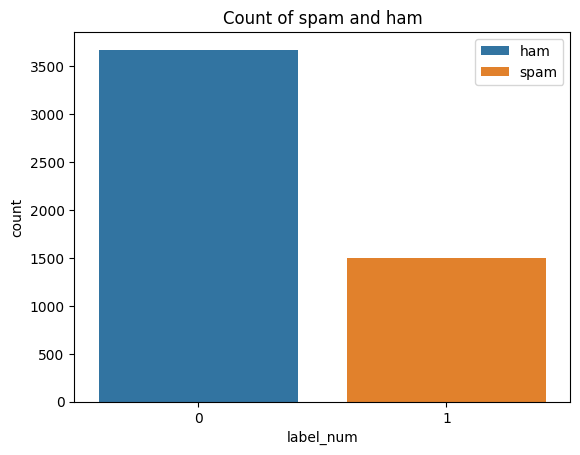

In [ ]:
sns.countplot(x=df['label_num'],label=['ham','spam'])
plt.title('Count of spam and ham')
plt.legend()

In [ ]:
#Extract length of all characters,words and sentances from text data
import nltk
nltk.download('punkt')
df['num_char']=df['text'].apply(len)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))

In [ ]:
from nltk.tokenize import sent_tokenize
df['num_sent']=df['text'].apply(lambda x:len(sent_tokenize(x)))

In [ ]:
df.head()

,text,label_num,text_new,num_char,num_words,num_sent
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter 988291 follow note gave ...,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january 9 2001 see attached file hpln...,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time y...,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending ...,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco pvr revenue und...,336,71,3


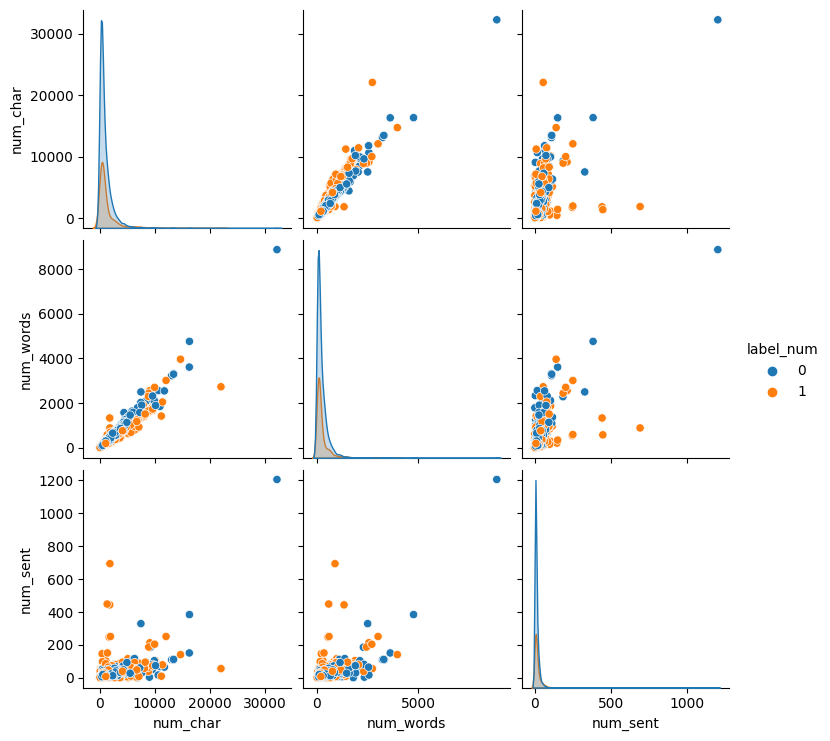

In [ ]:
sns.pairplot(data=df,hue='label_num')

In [ ]:
df1=df.iloc[:,-4:-6:-1]
df1

,text_new,label_num
0,enron methanol meter 988291 follow note gave ...,0
1,hpl nom january 9 2001 see attached file hpln...,0
2,neon retreat ho ho ho around wonderful time y...,0
3,photoshop windows office cheap main trending ...,1
4,indian springs deal book teco pvr revenue und...,0
...,...,...
5166,put 10 ft transport volumes decreased 25000 1...,0
5167,3 4 2000 following noms hpl take extra 15 mmc...,0
5168,calpine daily gas nomination julie mention ea...,0
5169,industrial worksheets august 2000 activity at...,0


###Split the data as training and testing data

In [ ]:
x=df1['text_new']
y=df1['label_num']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [ ]:
x_train.shape

(3619,)

In [ ]:
x_test.shape

(1552,)

In [ ]:
y_train.shape

(3619,)

In [ ]:
y_test.shape

(1552,)

In [ ]:
x_train,y_train

(3755     deal ticket 329242 meter 986887 drab gas 34 m...
 1536     may 2001 nomination attachment provides detai...
 4340     cornhusker gas management thought might helpf...
 1740     jordyn nothing like dream create future sake ...
 4878     50 made happen wall street people talking enr...
                               ...                        
 3603     mexican pharmacy mw would want inexpensive pe...
 4722     permanent fix penis growth limited offer add ...
 3340     intrastate 311 contracts guadalupe pipeline d...
 3064     enron net works e policy please review attach...
 3398     channel line maintenance fyi reduction total ...
 Name: text_new, Length: 3619, dtype: object,
 3755    0
 1536    0
 4340    0
 1740    1
 4878    0
        ..
 3603    1
 4722    1
 3340    0
 3064    0
 3398    0
 Name: label_num, Length: 3619, dtype: int64)

###Extract features from text data using count vectorizer

sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(max_df=0.7, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(x_train)
X_test_features = feature_extraction.transform(x_test)

METHOD-1:LOGESTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train_features,y_train)

LogisticRegression()

In [ ]:
prediction=model_LR.predict(X_train_features)
from sklearn.metrics import accuracy_score
print("Accuracy of training data",accuracy_score(y_train,prediction)*100)

Accuracy of training data 99.55788891959104


In [ ]:
x_train,prediction

(3755     deal ticket 329242 meter 986887 drab gas 34 m...
 1536     may 2001 nomination attachment provides detai...
 4340     cornhusker gas management thought might helpf...
 1740     jordyn nothing like dream create future sake ...
 4878     50 made happen wall street people talking enr...
                               ...                        
 3603     mexican pharmacy mw would want inexpensive pe...
 4722     permanent fix penis growth limited offer add ...
 3340     intrastate 311 contracts guadalupe pipeline d...
 3064     enron net works e policy please review attach...
 3398     channel line maintenance fyi reduction total ...
 Name: text_new, Length: 3619, dtype: object,
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
prediction1=model_LR.predict(X_test_features)
print("Accuracy of testing data",accuracy_score(y_test,prediction1)*100)

Accuracy of testing data 98.84020618556701


In [ ]:
x_test,prediction1

(830      tuesday december 26 th mary come tuesday mary...
 4395     hpl nom dec 15 2000 see attached file hplnl 2...
 1297     pleasure 1 um ambl 1 en xanaax tussioneex cla...
 2322     revisions enron hpl actuals nov 1 5 2000 volu...
 955      february wellhead production estimate bob ple...
                               ...                        
 4160     affordable pharmaceuticals valium xanax etc d...
 4449     ena 202 hpl 216 transport contracts needed me...
 4644     nomination 4 1 2000 per discussion eff 4 1 20...
 3616     enron hpl nom december 1 2000 see attached fi...
 2717     date new wild babe tonight bored wife girlfri...
 Name: text_new, Length: 1552, dtype: object,
 array([0, 0, 1, ..., 0, 0, 1]))

In [ ]:
text2=["Congrats! You won a lottery"]
x=feature_extraction.transform(text2)
prediction1=model_LR.predict(x)
if prediction1[0]==1:
  print('spam')
else:  
  print("ham")

spam
